In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
from utils_hmm import *

In [4]:
data=pd.read_csv('dataset_candidatura_wr/odometry_and_odometrycorrected.txt')
data=data.iloc[:,:-1]
cols=['x','y','th','x_w','y_w','th_w','x_1','y_1','th_1','x_2','y_2','th_2','x_dual','y_dual','th_dual']
data.columns=cols
data['error_w']=np.linalg.norm(data[['x_w','y_w']].values-data[['x','y']].values ,axis=1)
data['error_th_w']=np.linalg.norm(data[['th_w']].values-data[['th']].values ,axis=1)
data['error_1']=np.linalg.norm(data[['x_1','y_1']].values-data[['x','y']].values ,axis=1)
data['error_th_1']=np.linalg.norm(data[['th_1']].values-data[['th']].values ,axis=1)
data['error_2']=np.linalg.norm(data[['x_2','y_2']].values-data[['x','y']].values ,axis=1)
data['error_th_2']=np.linalg.norm(data[['th_2']].values-data[['th']].values ,axis=1)
data['error_dual']=np.linalg.norm(data[['x_dual','y_dual']].values-data[['x','y']].values ,axis=1)
data['error_th_dual']=np.linalg.norm(data[['th_dual']].values-data[['th']].values ,axis=1)

data

,x,y,th,x_w,y_w,th_w,x_1,y_1,th_1,x_2,...,y_dual,th_dual,error_w,error_th_w,error_1,error_th_1,error_2,error_th_2,error_dual,error_th_dual
0,-0.000056,-0.000034,-0.000350,-0.000115,-0.000039,-0.000379,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000060,0.000029,0.000065,0.000350,0.000065,0.000350,0.000065,0.000350
1,-0.000057,-0.000035,-0.000356,-0.000117,-0.000040,-0.000330,-0.000002,-1.235831e-06,0.000049,-0.000002,...,-1.235831e-06,0.000049,0.000060,0.000025,0.000064,0.000404,0.000064,0.000404,0.000064,0.000404
2,-0.000058,-0.000035,-0.000357,-0.000118,-0.000040,-0.000385,-0.000003,-1.119500e-06,-0.000006,-0.000003,...,-1.119500e-06,-0.000006,0.000060,0.000028,0.000065,0.000351,0.000065,0.000351,0.000065,0.000351
3,-0.000059,-0.000035,-0.000357,-0.000120,-0.000040,-0.000387,-0.000005,-1.296565e-06,-0.000008,-0.000005,...,-1.296565e-06,-0.000008,0.000061,0.000030,0.000064,0.000350,0.000064,0.000350,0.000064,0.000350
4,-0.000061,-0.000035,-0.000356,-0.000122,-0.000039,-0.000330,-0.000007,-4.621876e-07,0.000049,-0.000007,...,-4.621876e-07,0.000049,0.000062,0.000026,0.000063,0.000405,0.000063,0.000405,0.000063,0.000405
5,-0.000061,-0.000036,-0.000360,-0.000123,-0.000040,-0.000335,-0.000008,-1.519081e-06,0.000044,-0.000008,...,-1.519081e-06,0.000044,0.000062,0.000026,0.000063,0.000405,0.000063,0.000405,0.000063,0.000405
6,-0.000062,-0.000036,-0.000361,-0.000125,-0.000040,-0.000387,-0.000010,-9.629290e-07,-0.000008,-0.000010,...,-9.629290e-07,-0.000008,0.000063,0.000025,0.000063,0.000354,0.000063,0.000354,0.000063,0.000354
7,-0.000064,-0.000036,-0.000363,-0.000127,-0.000040,-0.000335,-0.000012,-1.477399e-06,0.000044,-0.000012,...,-1.477399e-06,0.000044,0.000063,0.000027,0.000062,0.000407,0.000062,0.000407,0.000062,0.000407
8,-0.000065,-0.000036,-0.000366,-0.000127,-0.000040,-0.000388,-0.000013,-1.271118e-06,-0.000009,-0.000013,...,-1.271118e-06,-0.000009,0.000063,0.000022,0.000063,0.000357,0.000063,0.000357,0.000063,0.000357
9,-0.000066,-0.000036,-0.000366,-0.000129,-0.000041,-0.000340,-0.000014,-2.015943e-06,0.000039,-0.000014,...,-2.015943e-06,0.000039,0.000064,0.000026,0.000061,0.000406,0.000061,0.000406,0.000061,0.000406


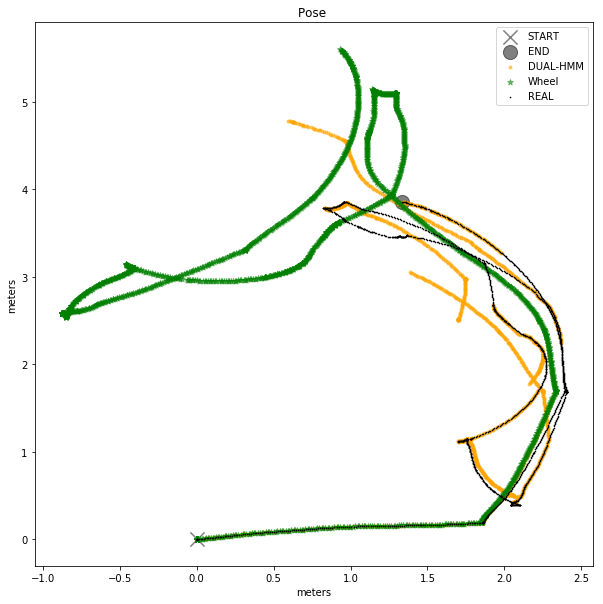

In [5]:
start=1550
end= 2000
data_s=data.iloc[start:end]
data_s=data
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.set_title( "Pose ")
ax1.set_ylabel('meters')
ax1.set_xlabel('meters')
ax1.scatter(x= data_s.x.iloc[:1], y=data_s.y.iloc[:1],marker='x',s=200,c='black',alpha=.5,label= 'START')
ax1.scatter(x= data_s.x.iloc[-1:], y=data_s.y.iloc[-1:],marker='o',s=200,c='black',alpha=.5,label= 'END')

#ax1.scatter(x= data_s.x_1, y=data_s.y_1,marker='.',c='red',alpha=.5,label= 'HMM Vk.. Kmeans')
#ax1.scatter(x= data_s.x_2, y=data_s.y_2,marker='.',c='blue',alpha=.5,label= 'HMM Vk.. Aff Prop')
ax1.scatter(x= data_s.x_dual, y=data_s.y_dual,marker='.',c='orange',alpha=.5,label= 'DUAL-HMM')
ax1.scatter(x= data_s.x_w, y=data_s.y_w,marker='*',c='green',alpha=.5,label= 'Wheel')
ax1.scatter(x= data_s.x, y=data_s.y,marker='*',s=.5,c='black',label= "REAL")
plt.legend()



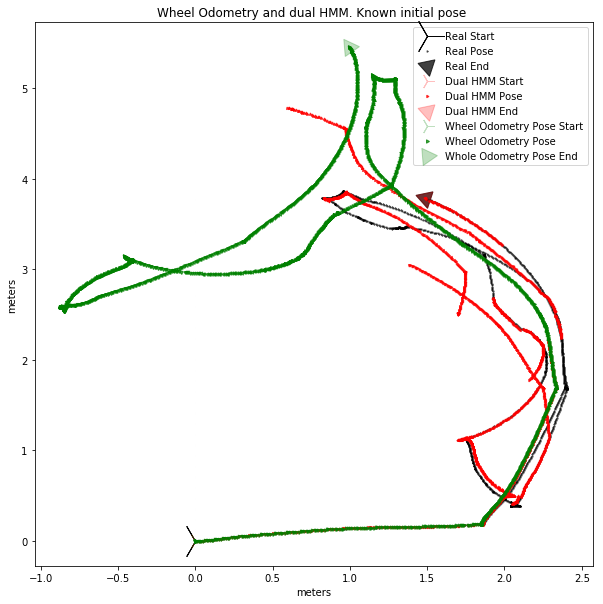

In [31]:
def plot_run_poses(data,start=0,length=500, title='',only_dual=True):
    
    data_s=data.iloc[start:start+length]
    #data_s=data
    fig = plt.figure(figsize=(10,10))
    

    ax1 = fig.add_subplot(111)
    ax1.set_title( title)
    ax1.set_ylabel('meters')
    ax1.set_xlabel('meters')
    
    path = data_s[['x','y','th']].values
    
   
    
    for i,c  in enumerate( path):
        ang=c[2]*180/np.pi
        if i== 0:
            ax1.plot(c[0], c[1], marker=(3, 2,ang-90  ), markersize=35,c='black', linestyle='None',alpha=0.99, label='Real Start')
        ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=2,c='black', linestyle='None',alpha=0.5, label= 'Real Pose')
    ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=20,c='black', linestyle='None',alpha=0.75, label='Real End')
    
    
    path = data_s[['x_dual','y_dual','th_dual']].values
    for i,c  in enumerate( path):
        ang=c[2]*180/np.pi
        if i== 0:
            ax1.plot(c[0], c[1], marker=(3, 2,ang-90  ), markersize=15,c='red', linestyle='None',alpha=0.25, label='Dual HMM Start')
        ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=3,c='red', linestyle='None',alpha=0.75, label= 'Dual HMM Pose')
    ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=20,c='red', linestyle='None',alpha=0.25, label='Dual HMM End')
    
    path = data_s[['x_w','y_w','th_w']].values
    
    for i,c  in enumerate( path):
        ang=c[2]*180/np.pi
        if i== 0:
            ax1.plot(c[0], c[1], marker=(3, 2,ang-90  ), markersize=15,c='green', linestyle='None',alpha=0.25, label='Wheel Odometry Pose Start')
        ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=4,c='green', linestyle='None',alpha=0.75, label= 'Wheel Odometry Pose')
    ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=20,c='green', linestyle='None',alpha=0.25, label='Whole Odometry Pose End')
    
    if only_dual:
        

        path = data_s[['x_1','y_1','th_1']].values



        for i,c  in enumerate( path):
            ang=c[2]*180/np.pi
            #if i== 0:
            #    ax1.plot(c[0], c[1], marker=(3, 2,ang-90  ), markersize=15,c='orange', linestyle='None',alpha=0.25, label='K-means Start')
            ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=2,c='orange', linestyle='None',alpha=0.5, label= 'K-means Pose')
        ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=20,c='orange', linestyle='None',alpha=0.75, label='K-means End')

        path = data_s[['x_2','y_2','th_2']].values



        for i,c  in enumerate( path):
            ang=c[2]*180/np.pi
            #if i== 0:
            #    ax1.plot(c[0], c[1], marker=(3, 2,ang-90  ), markersize=15,c='blue', linestyle='None',alpha=0.25, label='Aff. Prop. Start')
            ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=2,c='blue', linestyle='None',alpha=0.5, label= 'Aff. Prop. Pose')
        ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=20,c='blue', linestyle='None',alpha=0.75, label='Aff. Prop. End')

    
    plt.legend()
    

plot_run_poses(data,length=2000,title="Wheel Odometry and dual HMM. Known initial pose ",only_dual=False)

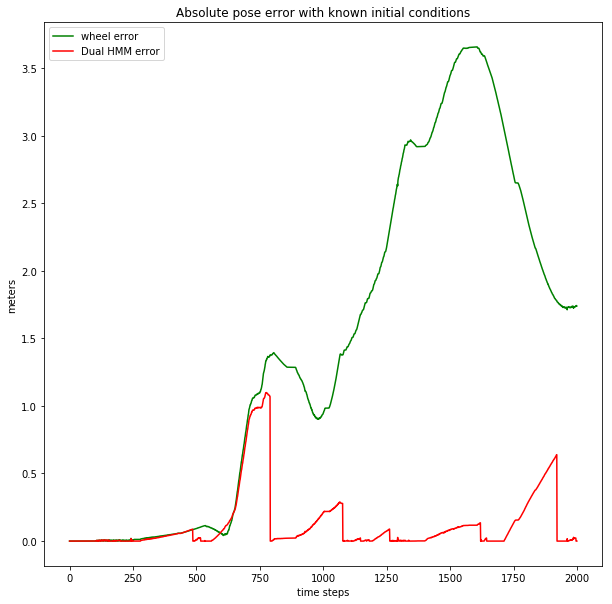

In [29]:
def plot_error (data,start=0,length=500,title='',only_dual=False):
    data_s=data.iloc[start:start+length]
    fig = plt.figure(figsize=(10,10))
    plt.plot(data.error_w[start:start+length],c='green',label='wheel error')
    plt.plot(data.error_dual[start:start+length],c='red',label='Dual HMM error')
    
    if only_dual:
        plt.plot(data.error_1[start:start+length],c='orange',label='K Means error')
        plt.plot(data.error_2[start:start+length],c='blue',label='Aff Prop error')

    ax1 = fig.add_subplot(111)
    ax1.set_title( title)
    ax1.set_ylabel('meters')
    ax1.set_xlabel('time steps')
    ax1.legend()
plot_error(data,0,2000,title="Absolute pose error with known initial conditions")

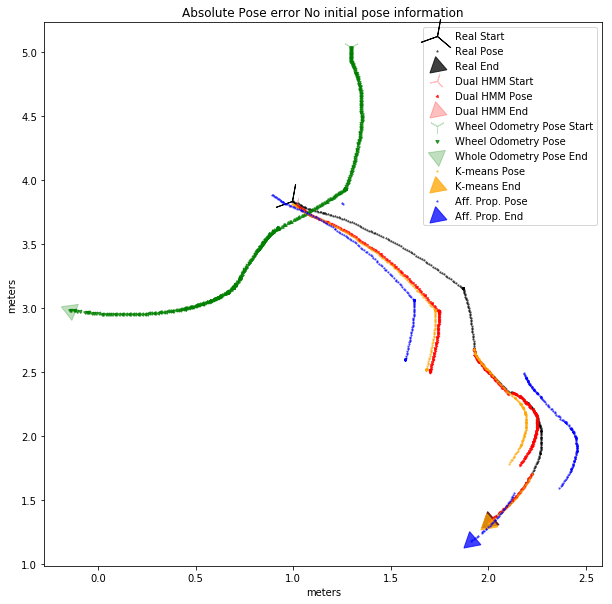

In [32]:
plot_run_poses(data,900,length=400,title="Absolute Pose error No initial pose information",only_dual=True)

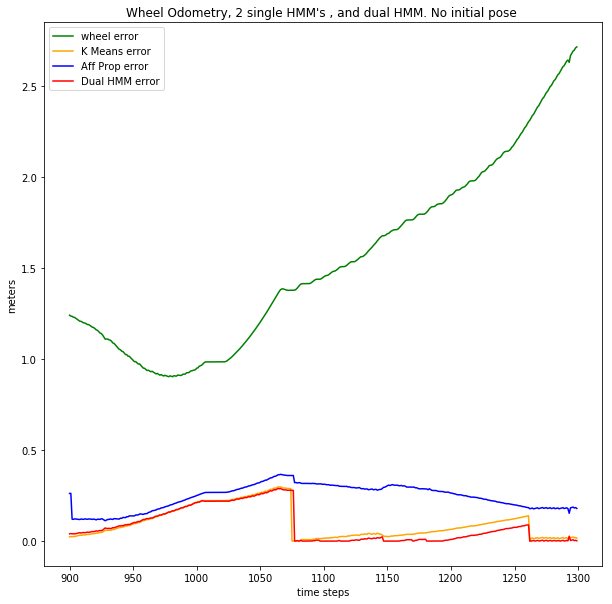

In [24]:
plot_error(data,900,length=400,title="Wheel Odometry, 2 single HMM's , and dual HMM. No initial pose ")

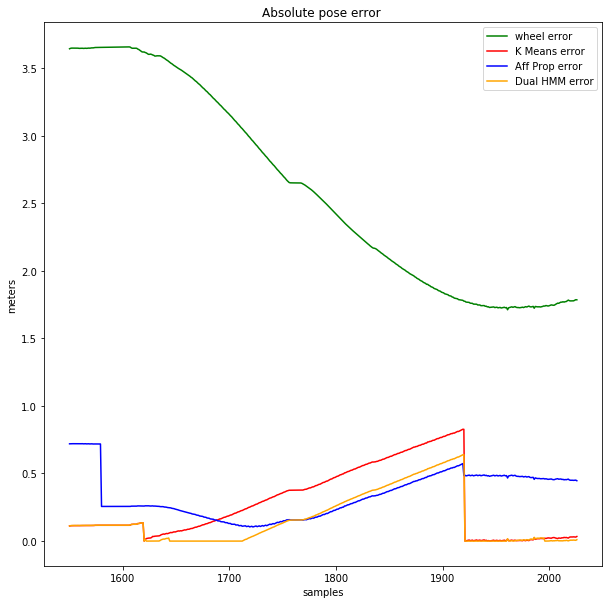

In [8]:


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.set_title( "Absolute pose error ")
ax1.set_ylabel('meters')
ax1.set_xlabel('samples')
plt.plot(data.error_w[start:start+end],c='green',label='wheel error')
plt.plot(data.error_1[start:start+end],c='red',label='K Means error')
plt.plot(data.error_2[start:start+end],c='blue',label='Aff Prop error')
plt.plot(data.error_dual[start:start+end],c='orange',label='Dual HMM error')

ax1.legend()

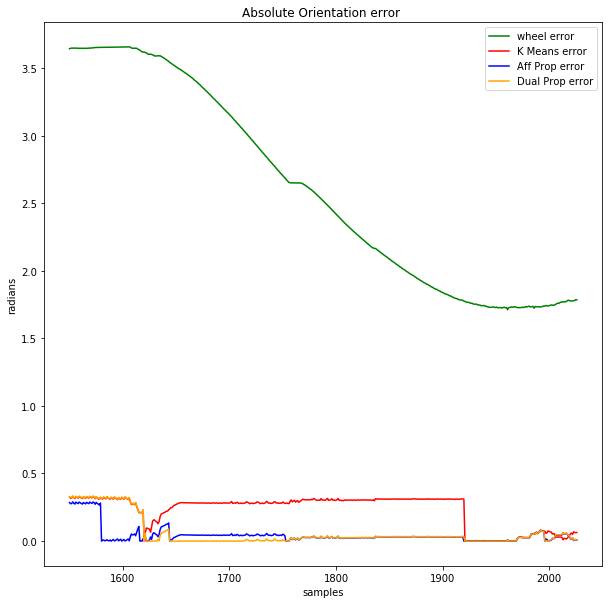

In [9]:
fig = plt.figure(figsize=(10,10))


plt.plot(data.error_w[start:start+end],c='green',label='wheel error')
plt.plot(data.error_th_1[start:start+end]%(1.9*np.pi),c='red',label='K Means error')
plt.plot(data.error_th_2[start:start+end]%(1.9*np.pi),c='blue',label='Aff Prop error')
plt.plot(data.error_th_dual[start:start+end]%(1.9*np.pi) ,c='orange',label='Dual Prop error')

ax1 = fig.add_subplot(111)
ax1.set_title( "Absolute Orientation error ")
ax1.set_ylabel('radians')
ax1.set_xlabel('samples')
ax1.legend()

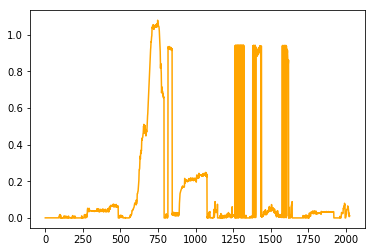

In [10]:
data['error_th_dual'] [data['error_th_dual']> (2*np.pi)]=data['error_th_dual'] [data['error_th_dual']> (2*np.pi)] - 2*np.pi
plt.plot(data.error_th_dual%(1.7*np.pi) ,c='orange',label='Dual Prop error')


In [11]:
5%3

2

In [12]:
trans.shape


NameError: name 'trans' is not defined

In [ ]:
ccxyth=np.load('ccxyth.npy')
A=np.load('A.npy')
N=len(A)
N

In [ ]:
ccxyth.shape

In [ ]:
for i in range (N):
    for j in range (N):
        trans[i,j,:]= ccxyth[i,:]-ccxyth[j,:]
    

In [ ]:
np.save('trans.npy',trans)

In [ ]:
data=pd.read_csv('dataset_hokuyo_wrs/lecs_odom_improvement.txt')
data.columns=['Vk_aff','Vk','S','x','y','th']
obs_2,obs,est= data['Vk_aff'],data['Vk'].values,data['S'].values
data.describe()

In [ ]:
data.tail()

In [ ]:
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.set_title( "Pose ")
ax1.set_ylabel('meters')
ax1.set_xlabel('meters')
ax1.scatter(x= data.x, y=data.y,marker='+',s=54,c=data['th'],label= "REAL")
#ax1.scatter(x= data.x, y=data.y,marker='*',s=1.5,c=data.S,label= "Quantized states")



In [ ]:
data.S.value_counts()

In [ ]:
data_13=data[data['S']==0]

In [ ]:
data_13['Vk_aff'].value_counts()

In [ ]:
B2_saved=np.load('B2.npy')
B_saved=np.load('B.npy')
B2_saved.shape ,  B_saved.shape

In [ ]:
_,B2 , _ = baum_welch(obs_2 , est)
B2_saved[7,64] , B2[7,64]

#B2_saved += (.001*B2)


In [ ]:
np.save('B2.npy',B2)
B2 [7,64]


In [ ]:
data_13['Vk'].value_counts()

In [ ]:
_,B , _ = baum_welch(obs , est)


B_saved[7,129] , B[7,129]

In [ ]:
np.save('B.npy',B)


In [ ]:
B.shape

In [ ]:
B2.shape ,B.shape

In [ ]:
from utils_hmm import *

In [ ]:
B_saved += (.001*B)
np.save('B2.npy',B2_saved)

In [ ]:
A_saved= np.load('A.npy')
B_saved= np.load('B.npy')


In [ ]:
np.linalg.norm(A-A_saved)

In [ ]:
np.linalg.norm(B-B_saved)

In [ ]:
dual_data= pd.read_csv('dataset_hokuyo_wrs/odometry_dual.txt')
cols=['x_w','y_w','th_w','x_2','y_2','th_2','x','y','th']
dual_data.columns= ['x_w','y_w','th_w','x_2','y_2','th_2','estimate_1','estimate_2','S','x','y','th','cha']

In [ ]:
#####from viterbi_takeshi.py

""" hmm12real[2]=xyth_odomcuant
                with  open('dataset_hokuyo_wrs/odometry_dual.txt' , 'a') as out:
                    text_line=""
                    for value in xyth_odom:
                        text_line+=str(value)+','
                    for value in xyth_hmms:
                        text_line+=str(value)+','
                    for value in hmm12real:   
                        text_line+=str(value)+','
                    for value in xyth:
                        text_line+=str(value)+','
                    text_line+='\n'"""

In [ ]:
dual_data.drop(labels='cha',inplace=True,axis=1)


In [ ]:
dual_data['error_w']=np.linalg.norm(dual_data[['x_w','y_w']].values-dual_data[['x','y']].values ,axis=1)
dual_data['error_th_w']=np.linalg.norm(dual_data[['th_w']].values-dual_data[['th']].values ,axis=1)
dual_data['error_2']=np.linalg.norm(dual_data[['x_2','y_2']].values-dual_data[['x','y']].values ,axis=1)
dual_data['error_th_2']=np.linalg.norm(dual_data[['th_2']].values-dual_data[['th']].values ,axis=1)

In [ ]:
dual_data

In [ ]:
dual_data[(dual_data['estimate_1']==dual_data['estimate_2']) & (dual_data['estimate_1']==dual_data['S'])]

In [ ]:
dual_data[dual_data['estimate_1']==dual_data['S']]['S'].value_counts()

In [ ]:
dual_data[dual_data['estimate_1']==dual_data['S']]['estimate_2'].value_counts()

In [ ]:
dual_data[dual_data['estimate_2']==dual_data['S']]['S'].value_counts()

In [ ]:

data_s=dual_data

fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.set_title( "Pose ")
ax1.set_ylabel('meters')
ax1.set_xlabel('meters')
#ax1.scatter(x= data_s.x_1, y=data_s.y_1,marker='.',c='red',alpha=.5,label= 'HMM Vk.. Kmeans')
ax1.scatter(x= data_s.x_2, y=data_s.y_2,marker='.',c='blue',alpha=.5,label= 'HMM DUAL')
ax1.scatter(x= data_s.x_w, y=data_s.y_w,marker='*',c='green',alpha=.5,label= 'Wheel')
ax1.scatter(x= data_s.x, y=data_s.y,marker='*',s=.5,c='black',label= "REAL")
plt.legend()



In [ ]:
dual_data

In [ ]:
start=0
end=len(dual_data)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.set_title( "Absolute pose error ")
ax1.set_ylabel('meters')
ax1.set_xlabel('samples')
plt.plot(dual_data.error_w[start:start+end],c='green',label='wheel error')

plt.plot(dual_data.error_2[start:start+end],c='blue',label='Dual')


ax1.legend()

In [ ]:
start=0
end=len(dual_data)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.set_title( "Absolute orientation error ")
ax1.set_ylabel('radians')
ax1.set_xlabel('samples')
plt.plot(dual_data.error_w[start:start+end],c='green',label='wheel error orientation')

plt.plot(dual_data.error_2[start:start+end],c='blue',label='Dual orientation')


ax1.legend()